# Assessment Topic

You are a data science consultant. Your client company has a dataset and a bunch of business questions. Therefore, you are required to build an exploratory data analysis pipeline in a Jupyter Notebook to answer these business questions. Your designed and implemented pipeline will be submitted to your client company.

For this practice, a Dataset that has been chosen is from Kaggle which initially from the IBM (Telco customer churn (11.1.3+), 2022) is related to a telco industry with 7k records and 20 features "WA_Fn-UseC_-Telco-Customer-Churn.CSV"

Download link for Dataset:

https://drive.google.com/drive/folders/1tVeHMCC-L7UBGAf5vRRHrLr8qhdkKtRs


# Business Problem Understanding

In this dataset, one of TelCo industry customers' datasets including demographic data, different service purchases, Monthly and total payments for each customer, and their churn status are available. As a result, I tried to answer and illustrate some questions which are always interesting from the business POV.

# Variable Description

01.	customerID: Unique Values
02.	gender: Whether the customer is a male or a female
03.	SeniorCitizen: Indicates if the customer is 65 or older (1, 0)/: Yes, No
04.	Partner: Whether the customer has a partner or not (Yes, No)
05.	Dependents: Whether the customer has dependents or not (Yes, No)
06.	Tenure: Number of months the customer has stayed with the company
07.	PhoneService: Whether the customer has a phone service or not (Yes, No)
08.	MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
09.	InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10.	OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11.	OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
12.	DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13.	TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14.	StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15.	StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16.	Contract: The contract term of the customer (Month-to-month, One year, Two year)
17.	PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18.	PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19.	MonthlyCharges: The amount charged to the customer monthly
20.	TotalCharges: The total amount charged to the customer
21.	Churn: Customers who left within the last month, the column is called Churn (Yes or No)


# Importing Libraries

Importing libraries such as:
1. pandas for data analysis.
2. numpy for working with arrays.
3. matplot and seaborn for representing graphs and plots
4. beautifultable and termcolr for table creation

In [1]:
import os
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from beautifultable import BeautifulTable

# Importing Data

Importing our dataset and indexing customerID as it is a unique ID, it is not a feature that we need to use for our model.

Represent first five rows as default

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Creating this directory at the beginning to export reports and graphs in case of any request.

In [3]:
if not os.path.exists(".\Reports"):
    os.mkdir("Reports")

Observing the Data types of variables in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Q1. How many of the customers' records were not inserted correctly or had no values? Find and suggest how to deal with them.

# Duplicate Checking

In [5]:
df.duplicated().sum()

0

As data explored "TotalCharges" field which contains a numeric value should be a float datatype by nature, but in our data set it is defined as an object after investigation we found some spaces in our values which it has been set to a null value.

For this purpose, we used the regex formula and numpy library to detect "spaces".

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(r"\s+", np.nan, regex=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

As expected the "TotalCharges" field is converted to float64.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The following lines indicated null values on related fields.

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The below lines indicate the rows which have null values.

null_idx is deifned to extract the IndexID of null values.

In [9]:
df[df.isna().any(axis=1)]
null_idx = df[df["TotalCharges"].isna()]
df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
null_idx.index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Replacing those null values with corresponding Monthly Charges is make sense as more or less at least it should be included in our Total charges.

In [11]:
df["TotalCharges"].fillna(df["MonthlyCharges"], inplace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
df.loc[null_idx.index]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


As expected all null values are replaced with new values"related Monthly Charges".

The codes below indicate the unique count and values for each object feature.

In [24]:
result = BeautifulTable()
result.header = ["Column", "Values", "Count"]
for i in df.select_dtypes(include="object"):
    result.append_row([i, df[i].unique(), df[i].nunique()])
print(result)

+------------------+----------------------------------------------------+------+
|    customerID    | ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801- | 7043 |
|                  |                JZAZL' '8361-LTMKD'                 |      |
|                  |                    '3186-AJIEK']                   |      |
+------------------+----------------------------------------------------+------+
|      gender      |                 ['Female' 'Male']                  |  2   |
+------------------+----------------------------------------------------+------+
|     Partner      |                    ['Yes' 'No']                    |  2   |
+------------------+----------------------------------------------------+------+
|    Dependents    |                    ['No' 'Yes']                    |  2   |
+------------------+----------------------------------------------------+------+
|   PhoneService   |                    ['No' 'Yes']                    |  2   |
+------------------+--------

A for loop has been used to generate all object columns with corresponding values in a table. No issue is observed in categorical values.

# Missing Values

Presentation of Null Values, As it is sorted as Descending there are no missing values; the first 10 rows are selected.

In [14]:
msd = df.isnull().sum().sort_values(ascending=False).head(5)
msd_per = round(msd / len(df) * 100, 2)
pd.DataFrame({"Null Values (Count)": msd, "Percentage (%)": msd_per.values})

,Null Values (Count),Percentage (%)
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0


In conclusion, there was no duplicate or missing values. and also there was no wrong entry in other fields. there were some wrong values (counted 11), which was "Space" in the "TotalCharges" field and it is replaced with the "MonthlyCharges" field accordingly. Our assumption is that the "Total Charges" of each customer should be bigger than or equal to "Monthly Charges". 

# Q2. How many costumers of this Company are Female and Male with their seniority status?

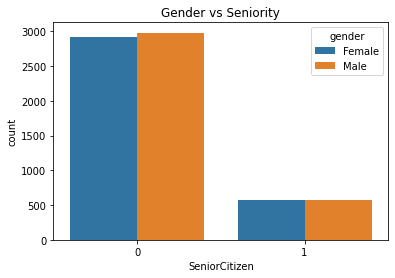

customerID
gender SeniorCitizen            
Female 0                    2920
       1                     568
Male   0                    2981
       1                     574

In [15]:
sns.countplot(x="SeniorCitizen", hue="gender", data=df)
plt1 = plt.xticks(rotation=0)
plt1 = plt.title("Gender vs Seniority")
plt.show()
df.iloc[:, [0, 1, 2]].groupby(["gender", "SeniorCitizen"]).count()

To answer this question, we used a plot to visualize the request and also used the "iloc" and "groupby" features of the pandas library to aggregate and represent the corresponding values.

# Q3. What is the Max Total Charge and is related to which customer and what is the average Total Charge for all customers?

In [16]:
totalAvg = [round(df["TotalCharges"].mean(), 2)]
df_new = df.iloc[:, [0, 1, 19]].nlargest(1, ["TotalCharges"])
df_new["Total Average"] = totalAvg
df_new

,customerID,gender,TotalCharges,Total Average
4610,2889-FPWRM,Male,8684.8,2279.8


To answer this question first we select specific columns and find related values with "nlargest" method. also we defined a new column to represent the average value of "TotalCharges" field.

# Q4. What is the churn status of customers in comparison with their subscribed products or services?

In [17]:
def chart():
    plt_drw = df_column.split()
    for word in plt_drw:
        sns.countplot(x="PaymentMethod", hue=word, data=df)
        plt1 = plt.xticks(rotation=45)
        plt1 = plt.title(word)
        plt.show()
        print("\n")

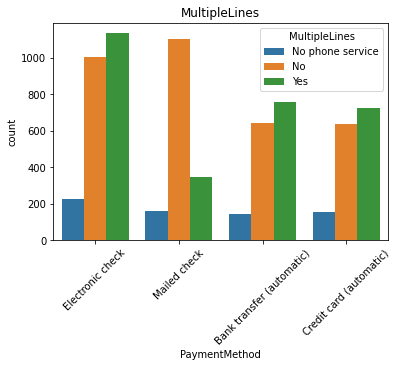

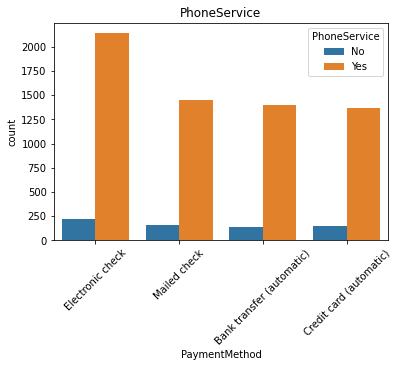

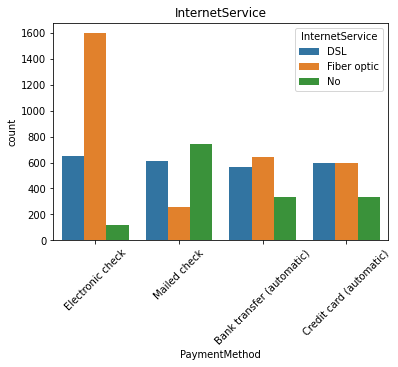

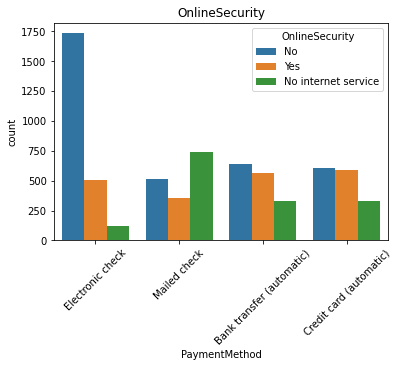

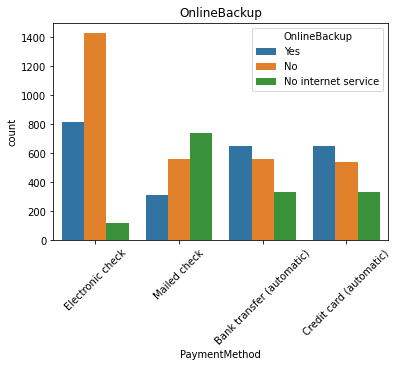

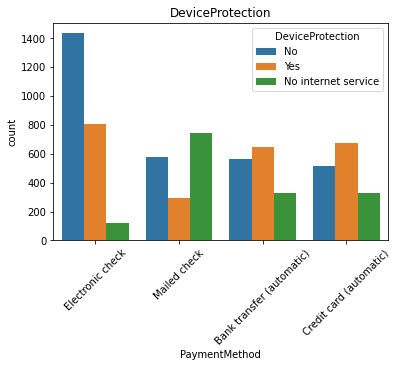

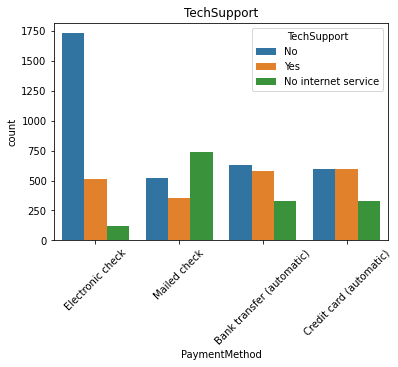

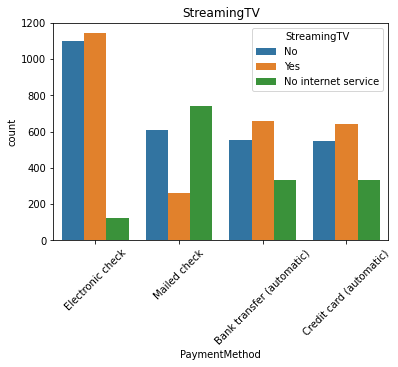

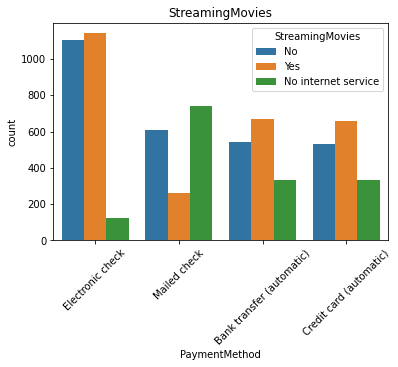

In [18]:
df_column = """ 
    MultipleLines PhoneService InternetService 
    OnlineSecurity OnlineBackup DeviceProtection
    TechSupport StreamingTV StreamingMovies  
"""
chart()

To answer this question first of all we defined a "function" and used a for loop to avoid repeating a code. 
then we selected the columns which refer to different services and products then we called a function to represent related charts. 

As illustrated for example "Multiple Lines" have less "Mailed check" in comparison to the other types, or those segments who are using "Fiber Optics" more are paying via "Electronic Check". for all charts we could have similar analysis and make a decision how to promote a campaign or announce them.

# Q5. Please let us know the distribution of tenancy of customers in comparison with their contracts.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

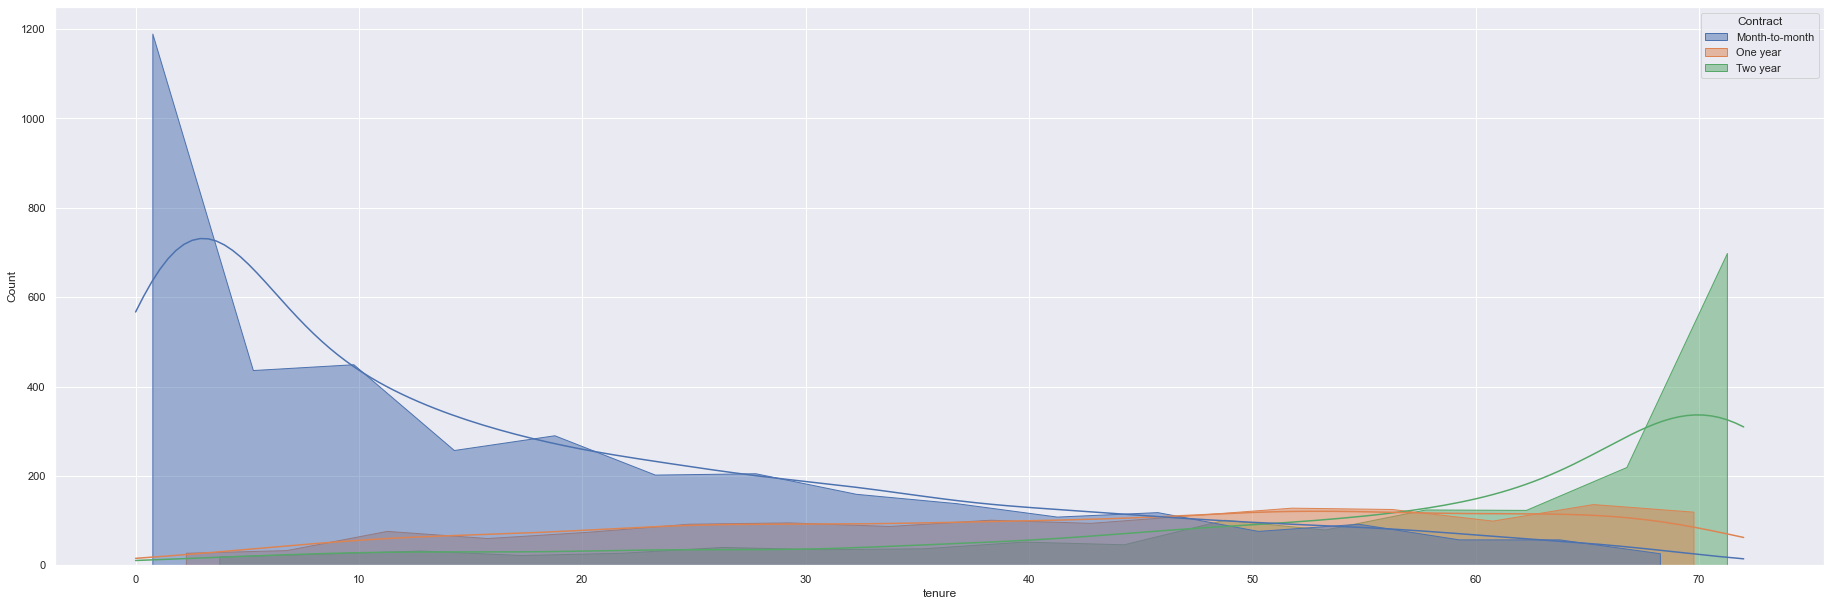

In [19]:
sns.set(rc={"figure.figsize": (31.7, 10.27)})
plt_cntrc = sns.histplot(
    data=df, x="tenure", hue="Contract", multiple="dodge", kde=True, element="poly"
)
plt_cntrc

From the above histogram chart, we realized that most new customers have short-term contracts "Month-to-month" and as long as they are using services for years, it is illustrated that they are switching to long-term as "Two-year" contracts which means they are more loyal to this company.

# Q6. Please investigate and find if there is any correlation between customers' tenure and their churn status.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

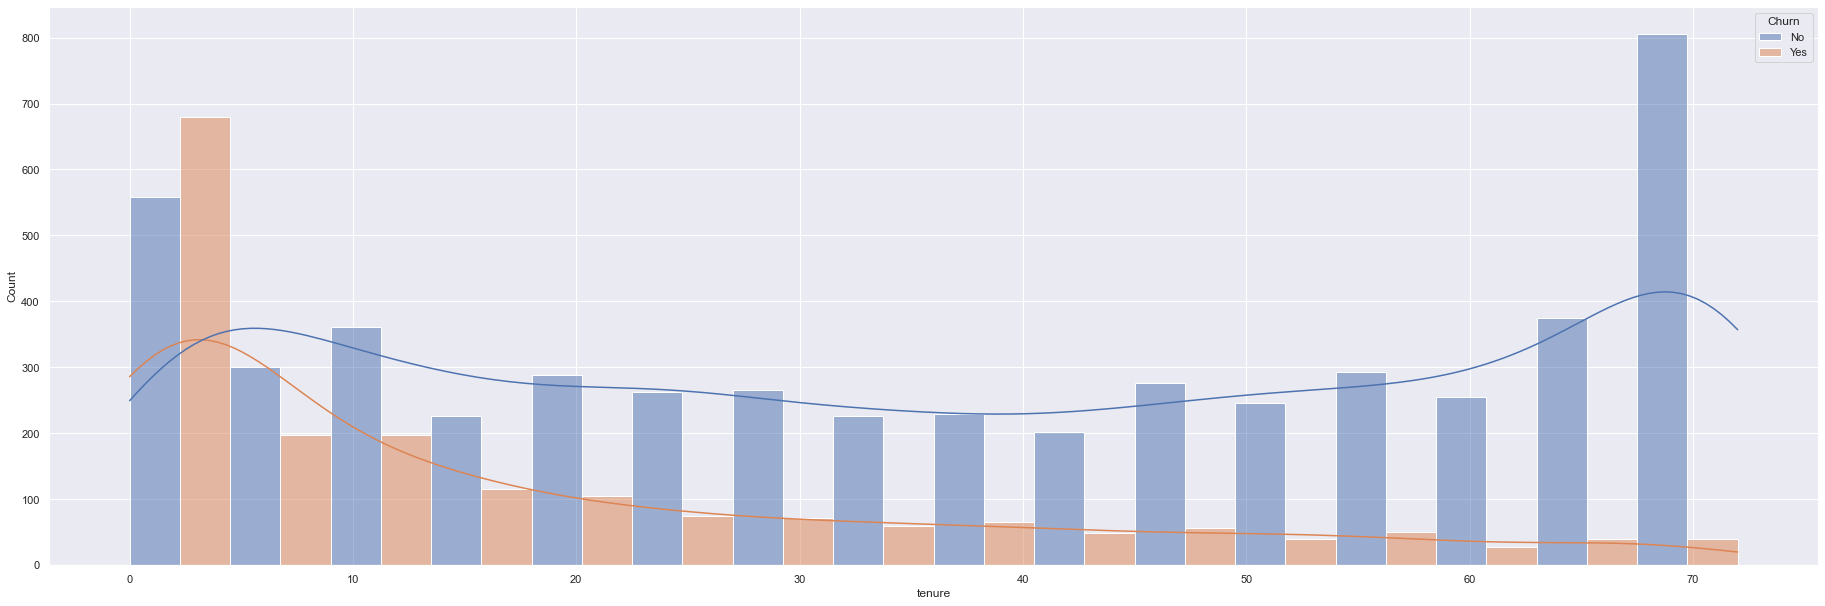

In [20]:
sns.set(rc={"figure.figsize": (31.7, 10.27)})
plt_tnr = sns.histplot(data=df, x="tenure", hue="Churn", multiple="dodge", kde=True)
plt_tnr

According to the above plot, we realized that most churned subscribers are those who have less than three-month tenure, and how long it passed the churn rate is reduced and stands at a fixed rate. so in the initial month, we need to run some campaigns and find the issues which might be could engage customers to use services.

# Q7. Please illustrate the trend of Churn rate charges vs Tenure and "Monthly Charges", also need to save the related graph in a specific path and make sure won't be overwritten on previous files.

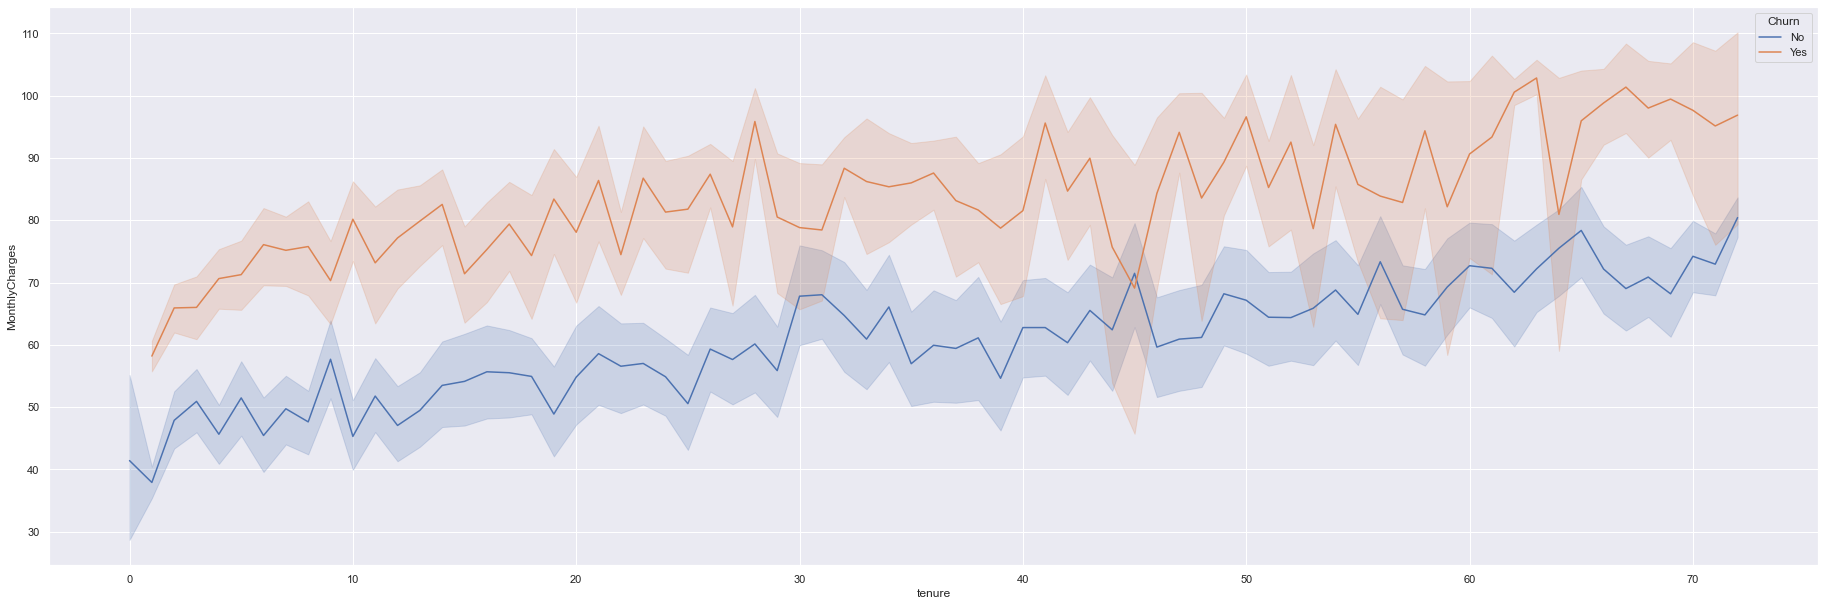

In [21]:
sns.set(rc={"figure.figsize": (31.7, 10.27)})
sns_plt = sns.lineplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn")

In [22]:
fig = sns_plt.get_figure()
fig.savefig(
    ".\Reports\Tenure-vs-MonthlyCharges-"
    + datetime.datetime.now().strftime(format="%Y-%m-%d-%H-%M")
    + ".png"
)

To answer this question we used a line plot and as we realized the best way to illustrate a meaningful trend is what we have done above, which shows mostly the trends of "Monthly Charges" vs "Churn in the area of tenancy.

as it is observable both parameters follow the same trend, but in some cases, we have a drop in churn which could be caused by any campaigns or other factors that impacted to have a reduction in some periods.

to save this report we created a path: "Reports" and put some parameters to pick up the date and time (Hour and Minute) of saving to make sure there will be no overwritten will happen whenever the command was run on existing files.

# Summary

As we explained at the beginning we tried to consult an imaginary company in the data science field to illustrate and visualize their data to value them.

The chosen dataset was related to the Telco industry and at first, we tried to have some cleaning up and pre-processing of the data and answer some questions regarding available records, for this purpose we tried to use some methods from Pandas and NumPy library also use some condition and defining a function to avoid repeating codes and make it reusable.

on the other hand, we use some plot libraries such as seaborn and plots to visualize our datasets. and use the OS library to make a directory and save requested files.

# Reference:


* Kaggle.com. 2022. Telco Customer Churn. [online] Available at: <https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv> [Accessed 19 August 2022].

* Community.ibm.com. 2022. Telco customer churn (11.1.3+). [online] Available at: <https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113> [Accessed 19 August 2022].
